In [7]:
import pandas as pd
data = pd.read_csv('student_performance (1).csv')

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X = data[['StudyHours']]
y = data['PastScore']
pipe = Pipeline([
    ('scaler' , StandardScaler()) ,
    ('model' , LinearRegression())
])
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42 )
pipe.fit(X_train  , y_train)
print("Model test predictions")
y_pred = pipe.predict(X_test)
hour = float(input("Enter the number of hours you studied :"))
user_input = pd.DataFrame({'StudyHours' : [hour]})
user_pred = pipe.predict(user_input)[0]
print(f"For the hours studied {hour} your mars will be {user_pred} /*based on historical data*/" \
    if user_pred <= 100 \
      else f"For the hours studied {hour} your marks will be 100 /*based on historical data*/")

Model test predictions


Enter the number of hours you studied : 13


For the hours studied 13.0 your marks will be 100 /*based on historical data*/


# Model Visualization

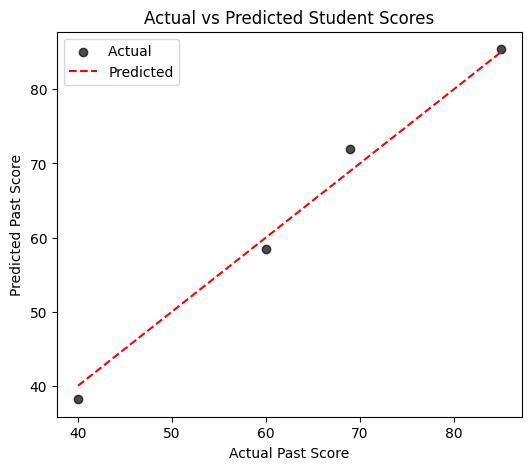

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7 , label = 'Actual ' , color = 'black' ,edgecolors ='black')
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--' , label = 'Predicted' , color = 'r' , markeredgecolor = 'black'
)
plt.xlabel("Actual Past Score")
plt.ylabel("Predicted Past Score")
plt.title("Actual vs Predicted Student Scores")
plt.legend()
plt.show()
